<h1 align='center'>=======================================================<br>Offline analysis of the links</h1>

## Importing and setting libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # http://matplotlib.org/gallery.html 
plt.style.use('ggplot') # https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
%matplotlib inline 

## Loading the data

In [2]:
df = pd.read_csv('20210510_how_many_links_microsoft_docs.csv', index_col=0)

## How many entries were retrieved?

In [3]:
len(df)

104796

## How the entries looks like?

In [4]:
df.head()

,url
0,https://docs.microsoft.com/en-us/
1,https://docs.microsoft.com/en-us/documentation
2,https://docs.microsoft.com/en-us/learn
3,https://docs.microsoft.com/en-us/answers/
4,https://docs.microsoft.com/en-us/samples/browse/


## Making sure all the entries end with '/'

In [5]:
df['url'] = df['url'].apply(lambda x: x+'/'if x.strip()[-1] != '/' else x)

## Extending the data by dividing URLs into layers (i.e. what comes after https://docs.microsoft.com/en-us/)

In [6]:
# Sometimes it ends with '/' sometimes not!
df['level2'] = df['url'].apply(lambda x: x.split('/')[4] if len(x.split('/'))>5 else 'N.A.')
df['level3'] = df['url'].apply(lambda x: x.split('/')[5] if len(x.split('/'))>6 else 'N.A.')
df['level4'] = df['url'].apply(lambda x: x.split('/')[6] if len(x.split('/'))>7 else 'N.A.')
df['level5'] = df['url'].apply(lambda x: x.split('/')[7] if len(x.split('/'))>8 else 'N.A.')

In [7]:
df.head()

,url,level2,level3,level4,level5
0,https://docs.microsoft.com/en-us/,N.A.,N.A.,N.A.,N.A.
1,https://docs.microsoft.com/en-us/documentation/,documentation,N.A.,N.A.,N.A.
2,https://docs.microsoft.com/en-us/learn/,learn,N.A.,N.A.,N.A.
3,https://docs.microsoft.com/en-us/answers/,answers,N.A.,N.A.,N.A.
4,https://docs.microsoft.com/en-us/samples/browse/,samples,browse,N.A.,N.A.


## Analysing and visualizing the Level2

In [8]:
level2_stats = df['level2'].value_counts()
level2_stats

windows                                45157
dotnet                                 11252
windows-hardware                        6996
javascript                              6788
azure                                   6385
                                       ...  
it-server                                  1
providers                                  1
.Invoke-ServiceFabricEncryptText.md        1
dvertising                                 1
mesh                                       1
Name: level2, Length: 249, dtype: int64

(-1.1028139987650734,
 1.1224231615995939,
 -1.10030393422514,
 1.1062584058218454)

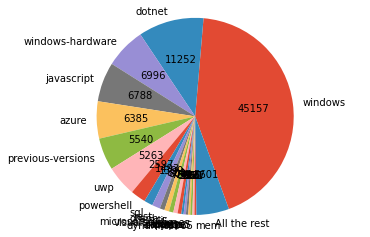

In [9]:
dictionary = level2_stats.to_dict()
threshold = 300

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

import itertools
newdic={}
for key, group in itertools.groupby(dictionary, lambda k: 'All the rest' if (dictionary[k]<threshold) else k):
    newdic[key] = sum([dictionary[k] for k in list(group)]) 
    
labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, 
#      autopct='%1.1f%%', 
       autopct=autopct_format(sizes),
       startangle=290)
ax.axis('equal')

# fig.savefig('name.eps', bbox_inches='tight',format='eps', dpi=1200)
# fig.savefig('name.png', bbox_inches='tight',format='png', dpi=1200, transparent=True)
# fig.show()

## Analysing and visualizing the Level3 (considering level 2 'Azure')

In [10]:
level3_azure_stats = df[df['level2'].str.contains('azure')]['level3'].value_counts()
level3_azure_stats

devops                                                 1038
active-directory                                        638
architecture                                            268
virtual-machines                                        234
cognitive-services                                      219
                                                       ... 
azure-supportability                                      1
dedicated-hsm                                             1
static-web-apps                                           1
azure-subscription-service-limits#networking-limits       1
remote-rendering                                          1
Name: level3, Length: 204, dtype: int64

(-1.100159780455464, 1.1031426523595336, -1.1078182170958155, 1.10102925521552)

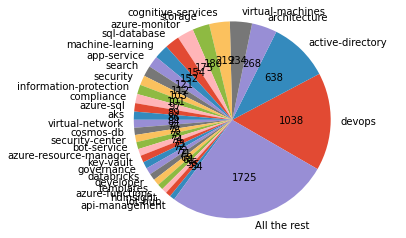

In [11]:
# fig = plt.figure(figsize=(5, 15))
# ax = plt.subplot2grid((1,1), (0,0))
# ax.set_title('Title')
# ax.set_ylim(min,max)
# ax.set_xlim(min,max)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

dictionary = level3_azure_stats.to_dict()
threshold = 50

import itertools
newdic={}
for key, group in itertools.groupby(dictionary, lambda k: 'All the rest' if (dictionary[k]<threshold) else k):
    newdic[key] = sum([dictionary[k] for k in list(group)]) 
    
labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct=autopct_format(sizes), startangle=-30)
ax.axis('equal')
# ax.set_title('Azure topics (aggregating >50 entries)')

# fig.savefig('name.eps', bbox_inches='tight',format='eps', dpi=1200)
# fig.savefig('name.png', bbox_inches='tight',format='png', dpi=1200, transparent=True)
# fig.show()

## (In general) How many documents are related to "Microsot Defender for Endpoint" or "MDATP"?

In [12]:
stats_mde = df[df['url'].str.contains('defender-endpoint')]
print(len(stats_mde))
stats_mde

95


,url,level2,level3,level4,level5
8356,https://docs.microsoft.com/en-us/microsoft-365...,microsoft-365,security,defender-endpoint,detect-block-potentially-unwanted-apps-microso...
8417,https://docs.microsoft.com/en-us/microsoft-365...,microsoft-365,security,defender-endpoint,N.A.
9450,https://docs.microsoft.com/en-us/microsoft-365...,microsoft-365,security,defender-endpoint,microsoft-defender-advanced-threat-protection
9451,https://docs.microsoft.com/en-us/microsoft-365...,microsoft-365,security,defender-endpoint,assign-portal-access
9928,https://docs.microsoft.com/en-us/microsoft-365...,microsoft-365,security,defender-endpoint,microsoft-defender-endpoint
...,...,...,...,...,...
85177,https://docs.microsoft.com/en-us/microsoft-365...,microsoft-365,security,defender-endpoint,tvm-microsoft-secure-score-devices
85178,https://docs.microsoft.com/en-us/microsoft-365...,microsoft-365,security,defender-endpoint,evaluate-mde
85179,https://docs.microsoft.com/en-us/microsoft-365...,microsoft-365,security,defender-endpoint,respond-file-alerts#stop-and-quarantine-files-...
85181,https://docs.microsoft.com/en-us/microsoft-365...,microsoft-365,security,defender-endpoint,troubleshoot-mde


In [13]:
stats_atp = df[df['level4'].str.contains('threat-protection')]
print(len(stats_atp))
stats_atp

270


,url,level2,level3,level4,level5
1738,https://docs.microsoft.com/en-us/windows/secur...,windows,security,threat-protection,windows-defender-application-control
1759,https://docs.microsoft.com/en-us/windows/secur...,windows,security,threat-protection,windows-defender-application-control
1823,https://docs.microsoft.com/en-us/windows/secur...,windows,security,threat-protection,intelligence
1846,https://docs.microsoft.com/en-us/windows/secur...,windows,security,threat-protection,intelligence
1847,https://docs.microsoft.com/en-us/windows/secur...,windows,security,threat-protection,windows-defender-antivirus
...,...,...,...,...,...
84947,https://docs.microsoft.com/en-us/windows/secur...,windows,security,threat-protection,microsoft-defender-antivirus
85154,https://docs.microsoft.com/en-us/windows/secur...,windows,security,threat-protection,security-compliance-toolkit-10#what-is-the-loc...
96622,https://docs.microsoft.com/en-us/windows/secur...,windows,security,threat-protection,windows-firewall
96623,https://docs.microsoft.com/en-us/windows/secur...,windows,security,threat-protection,microsoft-defender-antivirus


In [14]:
df.iloc[1846]['url'] 

'https://docs.microsoft.com/en-us/windows/security/threat-protection/intelligence/criteria#potentially-unwanted-application-pua/'

# ======================================================

words_remove = ['video']

In [23]:
df[df['url'].str.contains('best')]

,url,level2,level3,level4,level5
1655,https://docs.microsoft.com/en-us/office365/Ent...,office365,Enterprise,best-practices-anonymous-sharing,N.A.
2103,https://docs.microsoft.com/en-us/cloud-app-sec...,cloud-app-security,best-practices,N.A.,N.A.
2367,https://docs.microsoft.com/en-us/powershell/mo...,powershell,module,bestpractices,N.A.
3290,https://docs.microsoft.com/en-us/cloud-app-sec...,cloud-app-security,best-practices#discover-classify-label-and-pro...,N.A.,N.A.
4674,https://docs.microsoft.com/en-us/azure/archite...,azure,architecture,best-practices,monitoring
...,...,...,...,...,...
87580,https://docs.microsoft.com/en-us/dotnet/standa...,dotnet,standard,globalization-localization,best-practices-for-developing-world-ready-apps
88370,https://docs.microsoft.com/en-us/azure/contain...,azure,container-registry,container-registry-best-practices#repository-n...,N.A.
89712,https://docs.microsoft.com/en-us/windows-hardw...,windows-hardware,drivers,install,dif-selectbestcompatdrv
98623,https://docs.microsoft.com/en-us/azure/best-pr...,azure,best-practices-monitoring,N.A.,N.A.
